# FINAL MODULE PROJECT - GROUP 5

## Predict genetic disorders from dataset

In [1]:
import pandas as pd
import numpy as np

import os
print(os.listdir("./"))

['.gitignore', '.ipynb_checkpoints', 'resources', 'pathology_prediction.py', 'data', '.git', 'Notebook _G5_Project_mig.ipynb', 'explicacion_cols.pdf', 'train_genetic_disorders.csv', 'README.md', 'PROJECT.md', 'notebook-ml-1.ipynb', 'DATASETS.md', 'Notebook _G5_Project.ipynb']


In [2]:
data = pd.read_csv('./train_genetic_disorders.csv')
data.head()
print("Dataset size: ", data.shape)

Dataset size:  (22083, 45)


In [3]:
data[data.isnull().all(1)].shape
print("Null rows_train:",data[data.isnull().all(1)].shape[0])

data=data[data.isnull().all(1)!=True]
data.shape

Null rows_train: 1072


(21011, 45)

In [4]:
print(data.apply(lambda col: col.unique()))

Patient Id                                          [PID0x6418, PID0x25d5, PID0x4a82, PID0x4ac8, P...
Patient Age                                         [2.0, 4.0, 6.0, 12.0, 11.0, 14.0, 3.0, 7.0, 1....
Genes in mother's side                                                                      [Yes, No]
Inherited from father                                                                  [No, Yes, nan]
Maternal gene                                                                          [Yes, No, nan]
Paternal gene                                                                               [No, Yes]
Blood cell count (mcL)                              [4.760603086, 4.91066906, 4.893297428, 4.70528...
Patient First Name                                  [Richard, Mike, Kimberly, Jeffery, Johanna, Ma...
Family Name                                         [nan, Hoelscher, Stutzman, Bryant, Camacho, Sa...
Father's name                                       [Larre, Brycen, Nashon, Aayaan

In [5]:
data.columns = data.columns.str.replace('\'','')
data.drop(columns=['Patient Id', 'Patient First Name', 'Family Name', 'Fathers name',
        'Institute Name', 'Location of Institute', 'Parental consent',
        'Place of birth', 'Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5'], axis=1, inplace=True)

In [6]:
print("Dataset size: ", data.shape)
print('\n', '**'* 50, '\n')
data.info()
print('\n', '**'* 50, '\n')
data.describe(include = 'all')

Dataset size:  (21011, 32)

 **************************************************************************************************** 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21011 entries, 0 to 21010
Data columns (total 32 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       19643 non-null  float64
 1   Genes in mothers side                             21011 non-null  object 
 2   Inherited from father                             20724 non-null  object 
 3   Maternal gene                                     18317 non-null  object 
 4   Paternal gene                                     21011 non-null  object 
 5   Blood cell count (mcL)                            21011 non-null  float64
 6   Mothers age                                       15293 non-null  float64
 7   Fathers age                                

,Patient Age,Genes in mothers side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mothers age,Fathers age,Status,Respiratory Rate (breaths/min),...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
count,19643.000000,21011,20724,18317,21011,21011.000000,15293.000000,15322.000000,21011,18952,...,18959,18965.000000,18977,18955.000000,18899.000000,19008.000000,18987.000000,18956.000000,18962,18943
unique,NaN,2,2,2,2,NaN,NaN,NaN,2,2,...,2,NaN,4,NaN,NaN,NaN,NaN,NaN,3,9
top,NaN,Yes,No,Yes,No,NaN,NaN,NaN,Alive,Normal (30-60),...,Singular,NaN,slightly abnormal,NaN,NaN,NaN,NaN,NaN,Mitochondrial genetic inheritance disorders,Leigh syndrome
freq,NaN,12509,12508,10125,11887,NaN,NaN,NaN,10572,9595,...,9509,NaN,4855,NaN,NaN,NaN,NaN,NaN,9686,4893
mean,6.974851,NaN,NaN,NaN,NaN,4.899004,34.522527,41.942436,NaN,NaN,...,NaN,7.484680,NaN,0.592034,0.552886,0.537405,0.497393,0.460804,NaN,NaN
std,4.322584,NaN,NaN,NaN,NaN,0.199829,9.847256,13.027701,NaN,NaN,...,NaN,2.653633,NaN,0.491470,0.497208,0.498612,0.500006,0.498474,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,4.092727,18.000000,20.000000,NaN,NaN,...,NaN,3.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,3.000000,NaN,NaN,NaN,NaN,4.763230,26.000000,31.000000,NaN,NaN,...,NaN,5.419026,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,7.000000,NaN,NaN,NaN,NaN,4.899548,35.000000,42.000000,NaN,NaN,...,NaN,7.473071,NaN,1.000000,1.000000,1.000000,0.000000,0.000000,NaN,NaN
75%,11.000000,NaN,NaN,NaN,NaN,5.033977,43.000000,53.000000,NaN,NaN,...,NaN,9.528684,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN


In [7]:
data.isnull().sum()

Patient Age                                         1368
Genes in mothers side                                  0
Inherited from father                                287
Maternal gene                                       2694
Paternal gene                                          0
Blood cell count (mcL)                                 0
Mothers age                                         5718
Fathers age                                         5689
Status                                                 0
Respiratory Rate (breaths/min)                      2059
Heart Rate (rates/min                               2025
Follow-up                                           2070
Gender                                              2063
Birth asphyxia                                      2058
Autopsy shows birth defect (if applicable)           966
Folic acid details (peri-conceptional)              2013
H/O serious maternal illness                        2052
H/O radiation exposure (x-ray) 

In [8]:
# Removing those from genetic disorder which are null
data['Genetic Disorder'].replace('', np.nan, inplace=True)
data.dropna(subset=['Genetic Disorder'], inplace=True)
data.isnull().sum()

Patient Age                                         1174
Genes in mothers side                                  0
Inherited from father                                246
Maternal gene                                       2326
Paternal gene                                          0
Blood cell count (mcL)                                 0
Mothers age                                         4921
Fathers age                                         4903
Status                                                 0
Respiratory Rate (breaths/min)                      1750
Heart Rate (rates/min                               1730
Follow-up                                           1786
Gender                                              1752
Birth asphyxia                                      1780
Autopsy shows birth defect (if applicable)           814
Folic acid details (peri-conceptional)              1733
H/O serious maternal illness                        1739
H/O radiation exposure (x-ray) 

In [9]:
data = data.rename(columns={"Genes in mother's side":'defective_mother',
                    'Inherited from father':'defective_father',
                    'Maternal gene':'maternal_gene','Paternal gene':'paternal_gene',
                    'Respiratory Rate (breaths/min)':'respiratory_rate','Heart Rate (rates/min':'heart_rate',
                    'Parental consent':'parental_consent','Follow-up':'follow_up','Birth asphyxia':'birth_asphyxia',
                    'Autopsy shows birth defect (if applicable)':'birth_defect_autopsy','Place of birth':'birth_place',
                    'Folic acid details (peri-conceptional)':'folic_acid_periconceptional',
                    'H/O serious maternal illness':'maternal_illness','H/O radiation exposure (x-ray)':'radiation_exposure',
                    'H/O substance abuse':'substance_abuse','Assisted conception IVF/ART':'assisted_conception',
                    'History of anomalies in previous pregnancies':'previous_pregnancy_anomalies',
                    'Birth defects':'birth_defects','Blood test result':'blood_test_result','Genetic Disorder':'genetic_disorder',
                    'Disorder Subclass':'disorder_subclass','Patient Age':'patient_age','Blood cell count (mcL)':'blood_cell_count',
                    "Mother's age":'mother_age',"Father's age":'father_age','No. of previous abortion':'num_previous_abortion',
                    'White Blood cell count (thousand per microliter)':'WBC_count'})

In [10]:
# Data cleaning from predict_genetic_disorder notebook in Kaggle
data=data.replace('-99',np.nan)
data['radiation_exposure']=data['radiation_exposure'].replace('-','others')
data['substance_abuse']=data['substance_abuse'].replace('-','others')
data['radiation_exposure']=data['radiation_exposure'].replace('-','others')
data['substance_abuse']=data['substance_abuse'].replace('-','others')
data['WBC_count']=data['WBC_count'].mask(data['WBC_count']<0,np.nan)
data['num_previous_abortion']=data['num_previous_abortion'].mask(data['num_previous_abortion']<0,np.nan)

In [11]:
data.head()

,patient_age,Genes in mothers side,defective_father,maternal_gene,paternal_gene,blood_cell_count,Mothers age,Fathers age,Status,respiratory_rate,...,birth_defects,WBC_count,blood_test_result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,genetic_disorder,disorder_subclass
0,2.0,Yes,No,Yes,No,4.760603,NaN,NaN,Alive,Normal (30-60),...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
2,6.0,Yes,No,No,No,4.893297,41.0,22.0,Alive,Normal (30-60),...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,12.0,Yes,No,Yes,No,4.705280,21.0,NaN,Deceased,Tachypnea,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,11.0,Yes,No,NaN,Yes,4.720703,32.0,NaN,Alive,Tachypnea,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer
5,14.0,Yes,No,Yes,No,5.103188,NaN,NaN,Deceased,NaN,...,Multiple,10.272230,normal,1.0,0.0,0.0,1.0,0.0,Single-gene inheritance diseases,Cystic fibrosis


In [12]:
# Missing value imputation from predict_genetic_disorder notebook in Kaggle
from sklearn.impute import SimpleImputer
imp_mode=SimpleImputer(strategy='most_frequent')
imp_mode_num=SimpleImputer(strategy='most_frequent')
imp_median=SimpleImputer(strategy='median')

pd.options.mode.chained_assignment = None

for i in data.columns:
    if (data[i].dtype.name!='object')&(data[i].nunique()<=3):
        imp_mode_num.fit(np.array(data[i]).reshape(-1,1))
        data[i]=imp_mode_num.transform(np.array(data[i]).reshape(-1,1))

    elif (data[i].dtype.name!='object')&(data[i].nunique()>3):
        imp_median.fit(np.array(data[i]).reshape(-1,1))
        data[i]=imp_median.transform(np.array(data[i]).reshape(-1,1))
    else:
        imp_mode.fit(np.array(data[i]).reshape(-1,1))
        data[i]=imp_mode.transform(np.array(data[i]).reshape(-1,1))

In [13]:
data.isnull().sum()

patient_age                     0
Genes in mothers side           0
defective_father                0
maternal_gene                   0
paternal_gene                   0
blood_cell_count                0
Mothers age                     0
Fathers age                     0
Status                          0
respiratory_rate                0
heart_rate                      0
follow_up                       0
Gender                          0
birth_asphyxia                  0
birth_defect_autopsy            0
folic_acid_periconceptional     0
maternal_illness                0
radiation_exposure              0
substance_abuse                 0
assisted_conception             0
previous_pregnancy_anomalies    0
num_previous_abortion           0
birth_defects                   0
WBC_count                       0
blood_test_result               0
Symptom 1                       0
Symptom 2                       0
Symptom 3                       0
Symptom 4                       0
Symptom 5     

In [14]:
data.shape

(18962, 32)

In [15]:
print('Número de muestras por clase:')
print(data["genetic_disorder"].value_counts())

Número de muestras por clase:
Mitochondrial genetic inheritance disorders     9686
Single-gene inheritance diseases                7291
Multifactorial genetic inheritance disorders    1985
Name: genetic_disorder, dtype: int64


<AxesSubplot:xlabel='genetic_disorder', ylabel='count'>

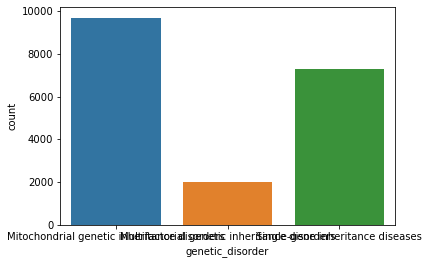

In [16]:
import seaborn as sns # buscar manera 
sns.countplot(data=data, x='genetic_disorder')

In [17]:
#for x in data.columns[2:len(data.columns)]:# que es esto, diferentes formas de valoración
 #   sns.displot(data=data, x=x, col='Genetic Disorder', kde=True, bins=10) #kde linea de valoracion

In [18]:
# see what we've got
print(data.columns)

Index(['patient_age', 'Genes in mothers side', 'defective_father',
       'maternal_gene', 'paternal_gene', 'blood_cell_count', 'Mothers age',
       'Fathers age', 'Status', 'respiratory_rate', 'heart_rate', 'follow_up',
       'Gender', 'birth_asphyxia', 'birth_defect_autopsy',
       'folic_acid_periconceptional', 'maternal_illness', 'radiation_exposure',
       'substance_abuse', 'assisted_conception',
       'previous_pregnancy_anomalies', 'num_previous_abortion',
       'birth_defects', 'WBC_count', 'blood_test_result', 'Symptom 1',
       'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5', 'genetic_disorder',
       'disorder_subclass'],
      dtype='object')


In [19]:
print(data.apply(lambda col: col.unique()))

patient_age                     [2.0, 6.0, 12.0, 11.0, 14.0, 3.0, 4.0, 7.0, 1....
Genes in mothers side                                                   [Yes, No]
defective_father                                                        [No, Yes]
maternal_gene                                                           [Yes, No]
paternal_gene                                                           [No, Yes]
blood_cell_count                [4.760603086, 4.893297428, 4.705280392, 4.7207...
Mothers age                     [35.0, 41.0, 21.0, 32.0, 40.0, 45.0, 44.0, 50....
Fathers age                     [42.0, 22.0, 63.0, 44.0, 56.0, 20.0, 24.0, 57....
Status                                                          [Alive, Deceased]
respiratory_rate                                      [Normal (30-60), Tachypnea]
heart_rate                                                  [Normal, Tachycardia]
follow_up                                                             [High, Low]
Gender          

In [20]:
# now lets see a lil header and change Yes and No values to binary
data.head()
data.columns = data.columns.str.replace('\'','')
data = data.replace(['No', 'Yes'], [0, 1])
data.head()

,patient_age,Genes in mothers side,defective_father,maternal_gene,paternal_gene,blood_cell_count,Mothers age,Fathers age,Status,respiratory_rate,...,birth_defects,WBC_count,blood_test_result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,genetic_disorder,disorder_subclass
0,2.0,1,0,1,0,4.760603,35.0,42.0,Alive,Normal (30-60),...,Singular,9.857562,slightly abnormal,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
2,6.0,1,0,0,0,4.893297,41.0,22.0,Alive,Normal (30-60),...,Singular,7.465056,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,12.0,1,0,1,0,4.705280,21.0,42.0,Deceased,Tachypnea,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,11.0,1,0,1,1,4.720703,32.0,42.0,Alive,Tachypnea,...,Multiple,4.098210,slightly abnormal,0.0,0.0,0.0,0.0,0.0,Multifactorial genetic inheritance disorders,Cancer
5,14.0,1,0,1,0,5.103188,35.0,42.0,Deceased,Normal (30-60),...,Multiple,10.272230,normal,1.0,0.0,0.0,1.0,0.0,Single-gene inheritance diseases,Cystic fibrosis


In [21]:
print(data.apply(lambda col: col.unique()))

patient_age                     [2.0, 6.0, 12.0, 11.0, 14.0, 3.0, 4.0, 7.0, 1....
Genes in mothers side                                                      [1, 0]
defective_father                                                           [0, 1]
maternal_gene                                                              [1, 0]
paternal_gene                                                              [0, 1]
blood_cell_count                [4.760603086, 4.893297428, 4.705280392, 4.7207...
Mothers age                     [35.0, 41.0, 21.0, 32.0, 40.0, 45.0, 44.0, 50....
Fathers age                     [42.0, 22.0, 63.0, 44.0, 56.0, 20.0, 24.0, 57....
Status                                                          [Alive, Deceased]
respiratory_rate                                      [Normal (30-60), Tachypnea]
heart_rate                                                  [Normal, Tachycardia]
follow_up                                                             [High, Low]
Gender          

In [22]:
# now lets check what we have left
# and lets change columns status, follow-up and birth defects.
def replaceduplets(column, value1, value2, to1, to2):
        data[column] = data[column].replace([value1, value2], [to1, to2])

replaceduplets('Status', 'Alive', 'Deceased', 1, 0)
replaceduplets('heart_rate', 'Tachycardia', 'Normal', 0, 1)
replaceduplets('follow_up', 'Low', 'High', 0, 1)
replaceduplets('birth_defects', 'Multiple', 'Singular', 0, 1)
replaceduplets('respiratory_rate', 'Tachypnea', 'Normal (30-60)', 0, 1)

print(data.apply(lambda col: col.unique()))

patient_age                     [2.0, 6.0, 12.0, 11.0, 14.0, 3.0, 4.0, 7.0, 1....
Genes in mothers side                                                      [1, 0]
defective_father                                                           [0, 1]
maternal_gene                                                              [1, 0]
paternal_gene                                                              [0, 1]
blood_cell_count                [4.760603086, 4.893297428, 4.705280392, 4.7207...
Mothers age                     [35.0, 41.0, 21.0, 32.0, 40.0, 45.0, 44.0, 50....
Fathers age                     [42.0, 22.0, 63.0, 44.0, 56.0, 20.0, 24.0, 57....
Status                                                                     [1, 0]
respiratory_rate                                                           [1, 0]
heart_rate                                                                 [1, 0]
follow_up                                                                  [1, 0]
Gender          

In [23]:
# And now same stuff for triplets
def replacetriplets(column, value1, value2, value3, to1, to2, to3):
        data[column] = data[column].replace([value1, value2, value3], [to1, to2, to3])
        
replacetriplets('Gender', 'Female', 'Ambiguous', 'Male', 0, 1, 2)
replacetriplets('genetic_disorder', 'Mitochondrial genetic inheritance disorders',
               'Single-gene inheritance diseases', 'Multifactorial genetic inheritance disorders', 1, 1, 0)
print(data.apply(lambda col: col.unique()))

patient_age                     [2.0, 6.0, 12.0, 11.0, 14.0, 3.0, 4.0, 7.0, 1....
Genes in mothers side                                                      [1, 0]
defective_father                                                           [0, 1]
maternal_gene                                                              [1, 0]
paternal_gene                                                              [0, 1]
blood_cell_count                [4.760603086, 4.893297428, 4.705280392, 4.7207...
Mothers age                     [35.0, 41.0, 21.0, 32.0, 40.0, 45.0, 44.0, 50....
Fathers age                     [42.0, 22.0, 63.0, 44.0, 56.0, 20.0, 24.0, 57....
Status                                                                     [1, 0]
respiratory_rate                                                           [1, 0]
heart_rate                                                                 [1, 0]
follow_up                                                                  [1, 0]
Gender          

In [24]:
# Last but not least cuadruplets!
def replacecuadruplets(column, value1, value2, value3, value4, to1, to2, to3, to4):
        data[column] = data[column].replace([value1, value2, value3, value4],
                        [to1, to2, to3, to4])

replacecuadruplets('blood_test_result', 'normal', 'slightly abnormal', 'abnormal',
                   'inconclusive', 3, 2, 1, 0)
replacecuadruplets('substance_abuse', 0, 1, 'Not applicable', 'others', 0, 1, 2, 3)
replacecuadruplets('radiation_exposure', 0, 1, 'Not applicable', 'others', 0, 1, 2, 3)
replacecuadruplets('birth_defect_autopsy', 0, 1, 'Not applicable', 'None', 0, 1, 2, 3)
replacecuadruplets('birth_asphyxia', 0, 1, 'Not available', 'No record', 0, 1, 2, 3)
print(data.apply(lambda col: col.unique()))

patient_age                     [2.0, 6.0, 12.0, 11.0, 14.0, 3.0, 4.0, 7.0, 1....
Genes in mothers side                                                      [1, 0]
defective_father                                                           [0, 1]
maternal_gene                                                              [1, 0]
paternal_gene                                                              [0, 1]
blood_cell_count                [4.760603086, 4.893297428, 4.705280392, 4.7207...
Mothers age                     [35.0, 41.0, 21.0, 32.0, 40.0, 45.0, 44.0, 50....
Fathers age                     [42.0, 22.0, 63.0, 44.0, 56.0, 20.0, 24.0, 57....
Status                                                                     [1, 0]
respiratory_rate                                                           [1, 0]
heart_rate                                                                 [1, 0]
follow_up                                                                  [1, 0]
Gender          

In [25]:
# Now converting every disorder subclass to numeric
data['disorder_subclass'] = data['disorder_subclass'].astype('category')
data['disorder_subclass'] = data['disorder_subclass'].cat.codes

/home/miguel/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


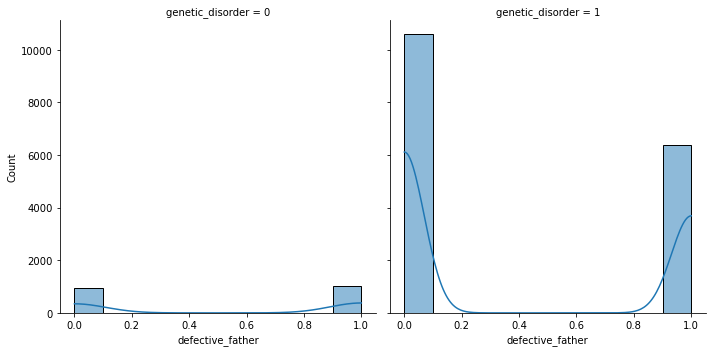

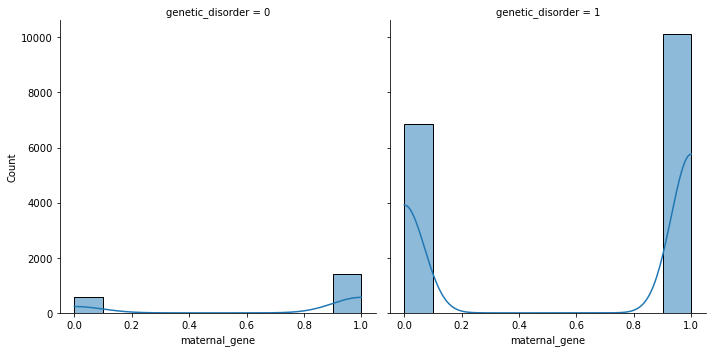

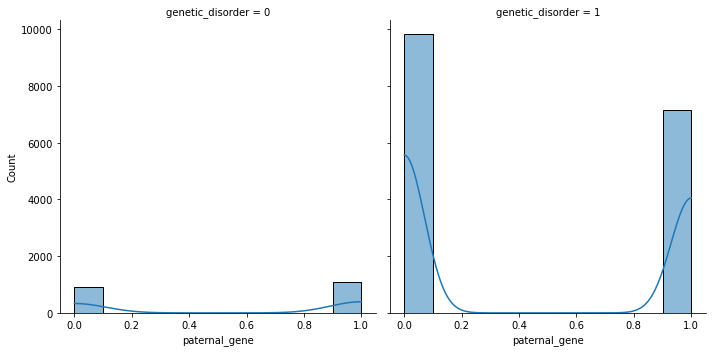

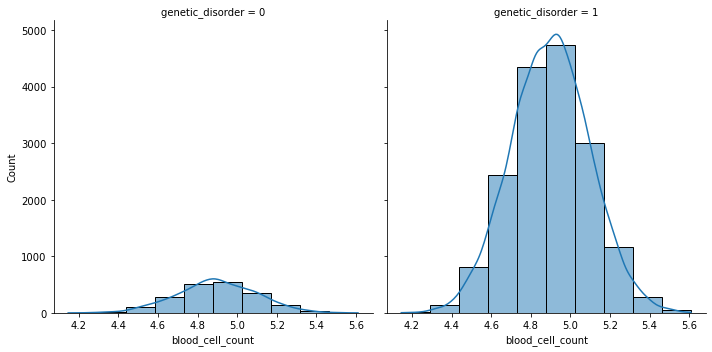

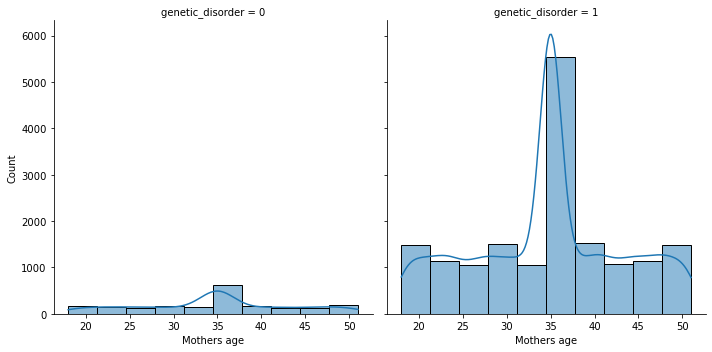

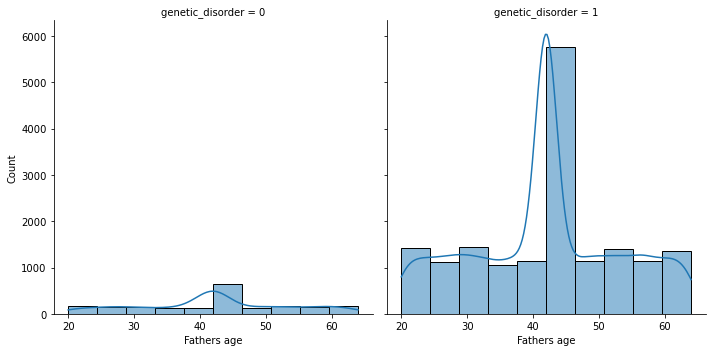

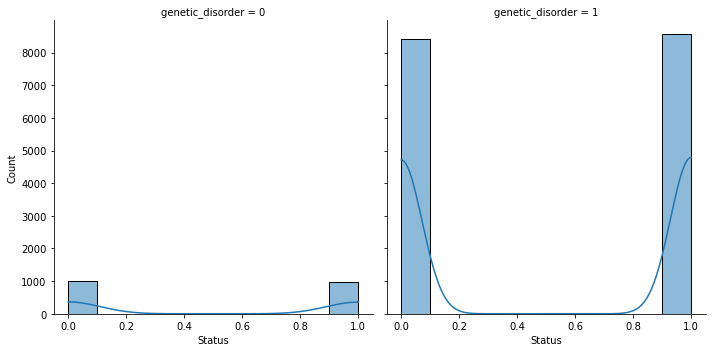

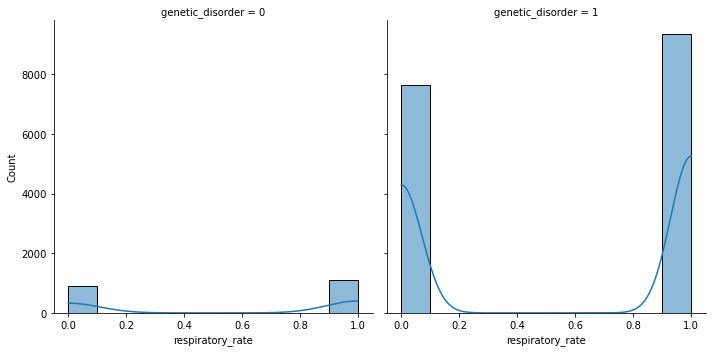

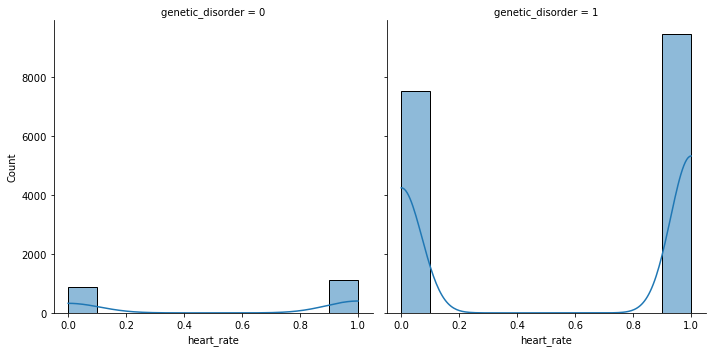

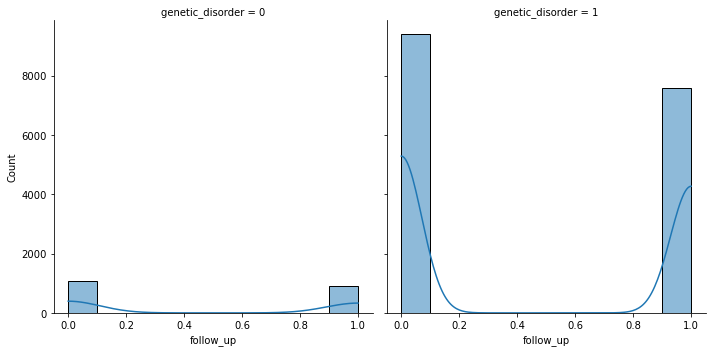

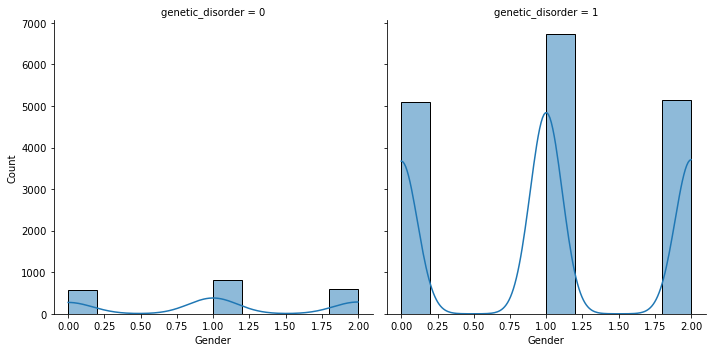

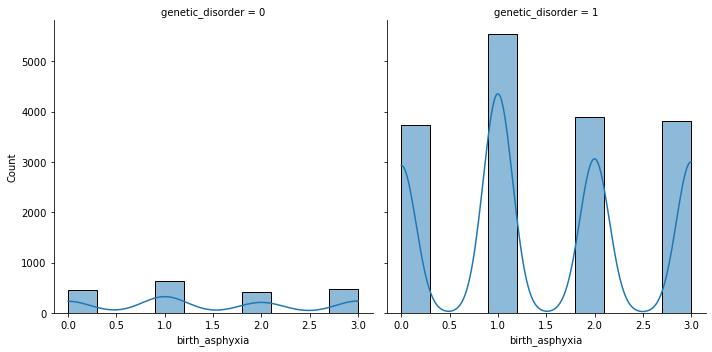

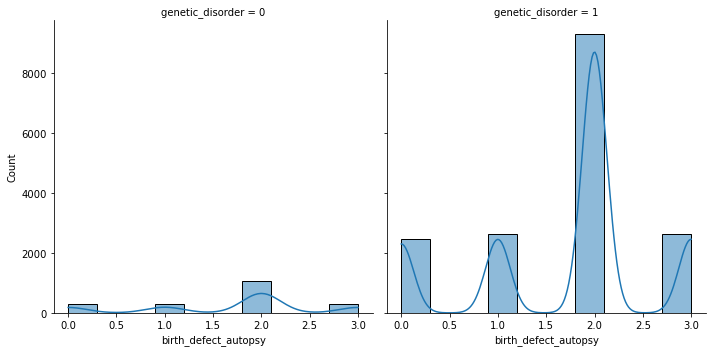

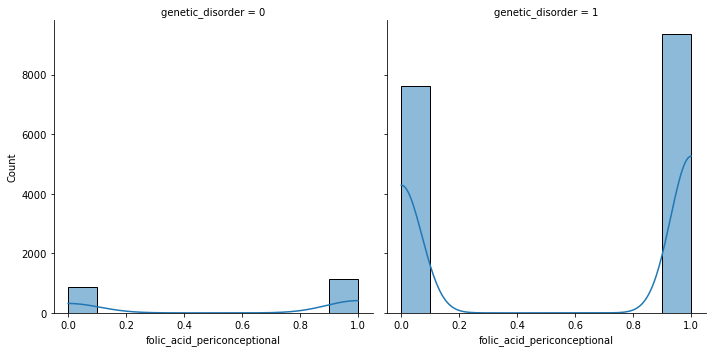

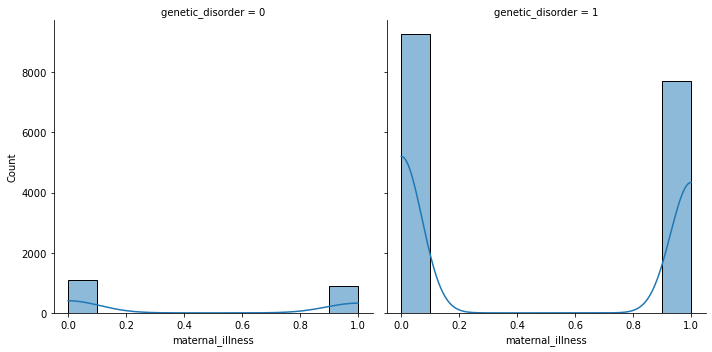

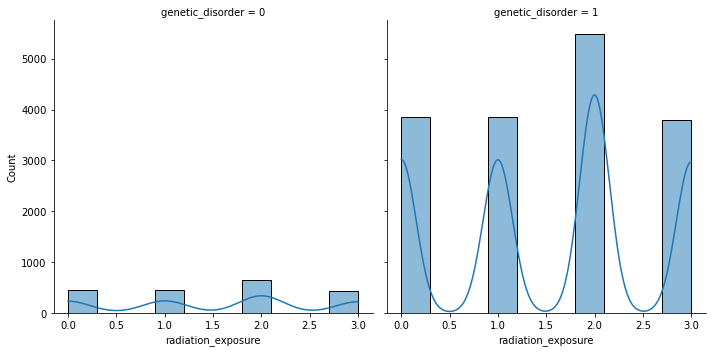

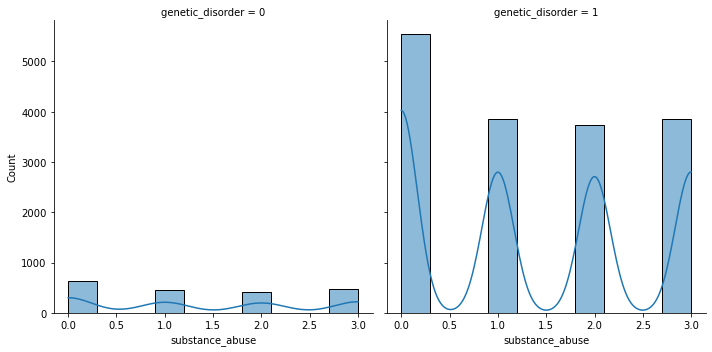

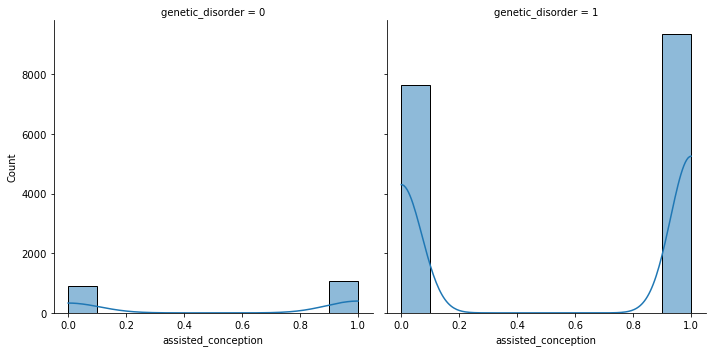

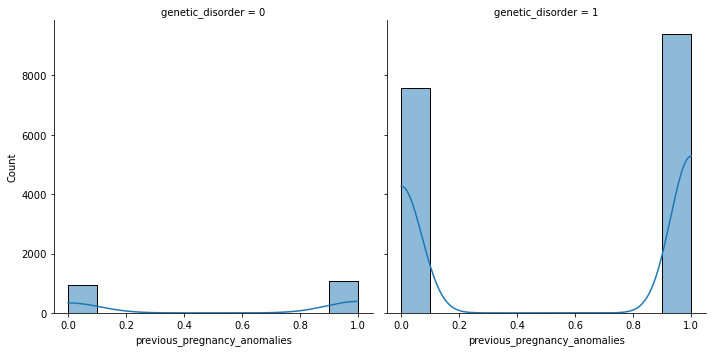

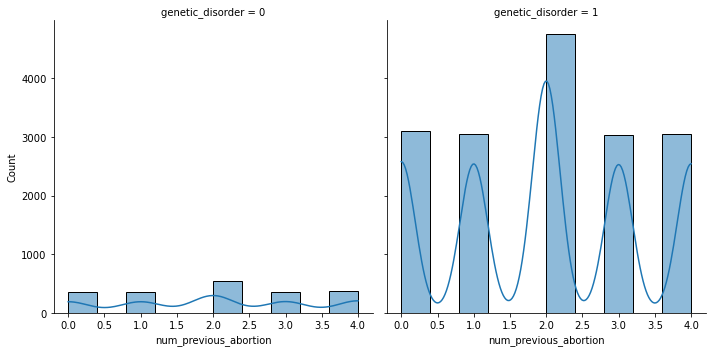

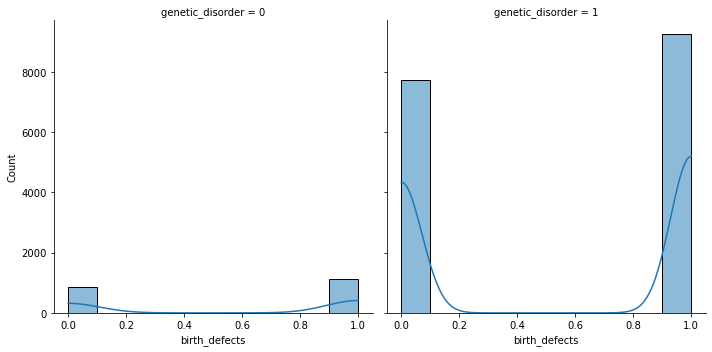

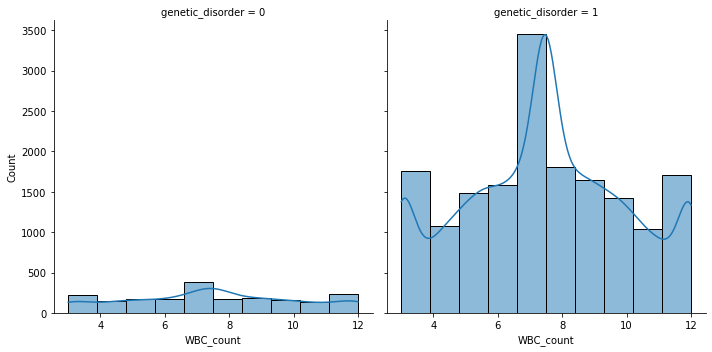

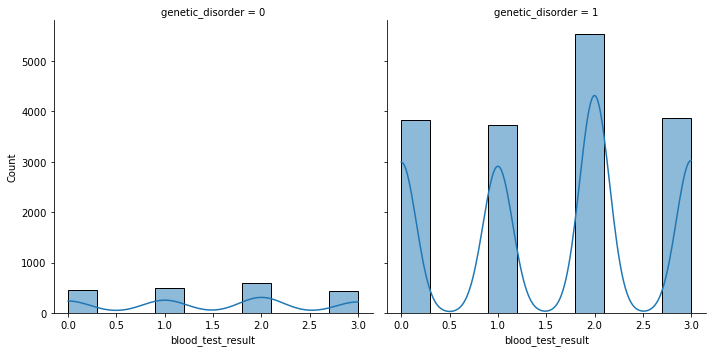

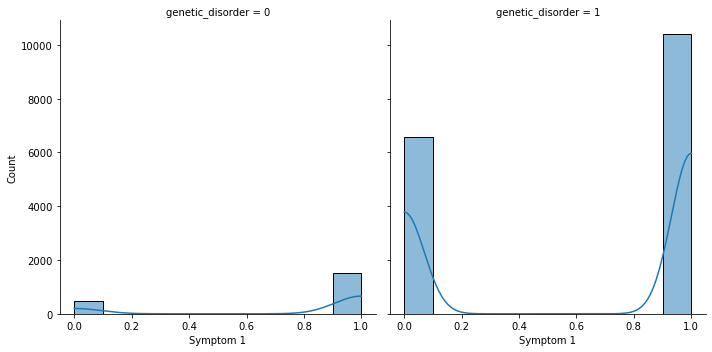

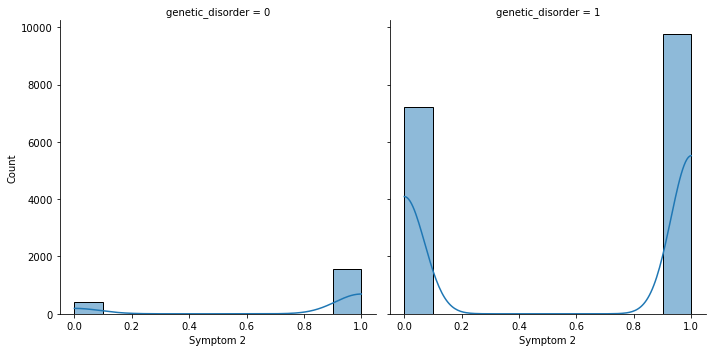

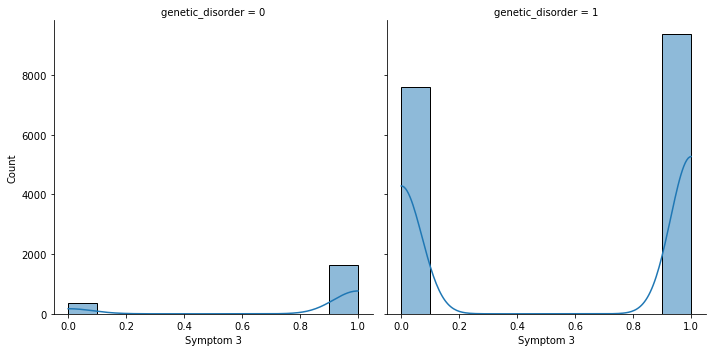

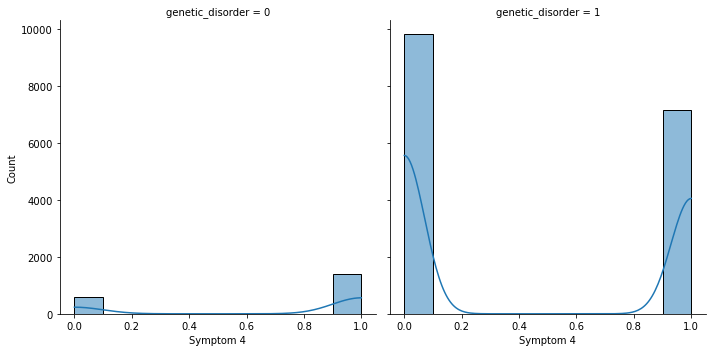

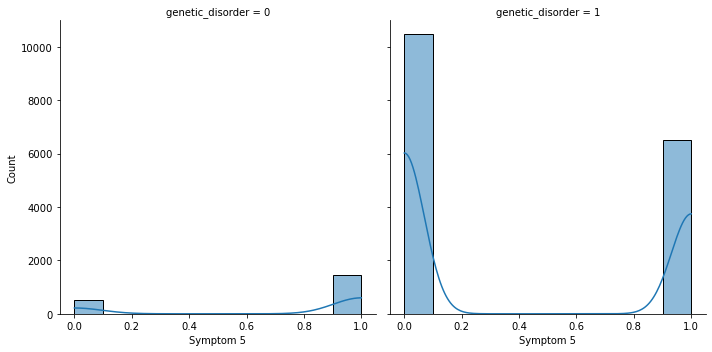

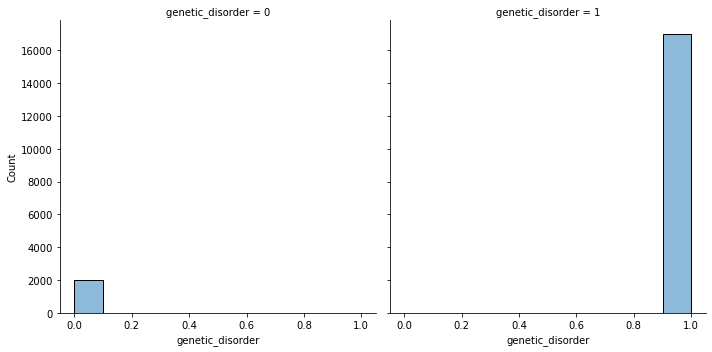

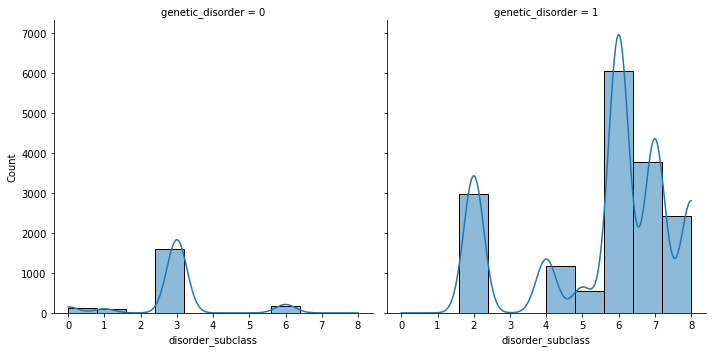

In [26]:
for x in data.columns[2:len(data.columns)]:
    sns.displot(data=data, x=x, col='genetic_disorder', kde=True, bins=10)

# División en train y test¶
En primer lugar, vamos a separar el conjunto de datos original que se encuentra en data en: X, un dataframe con las variables predictoras, e Y, un dataframe con la variable objetivo (la columna diagnosis). A la hora de crear X, también eliminamos la variable id puesto que no debe utilizarse para clasificación.

In [27]:
print('Tamaño del dataset (muestras x variables):', data.shape) # hacer idea de como va la vaína pt 2

X = data.iloc[:,:-2]
Y = pd.DataFrame(data['genetic_disorder'])
Y2 = pd.DataFrame(data['disorder_subclass'])

X.head()
Y.head()
Y2.head()

Tamaño del dataset (muestras x variables): (18962, 32)


,disorder_subclass
0,5
2,3
3,6
4,1
5,2


In [28]:
# for trainset 1
from sklearn.model_selection import train_test_split # mirar

random_state = 1998 # fijo semilla para reproducibilidad

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size=0.3, # 30% para test
    stratify=Y, # estratificar para respetar distribución e integridad
    random_state=random_state # dar semilla
)

In [29]:
# for trainset 2 (predicción de subtipos)
from sklearn.model_selection import train_test_split # mirar

random_state = 1998 # fijo semilla para reproducibilidad

X_train, X_test, Y2_train, Y2_test = train_test_split(
    X, Y2,
    test_size=0.3, # 30% para test
    stratify=Y2, # estratificar para respetar distribución e integridad
    random_state=random_state # dar semilla
)

In [30]:
X_train.info()
X_train.describe(include = 'all')
X_test.info()

print('Número de muestras por clase:')
print(Y_train['genetic_disorder'].value_counts())

print('Número de muestras por clase:')
print(Y_test['genetic_disorder'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13273 entries, 2561 to 12126
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   patient_age                   13273 non-null  float64
 1   Genes in mothers side         13273 non-null  int64  
 2   defective_father              13273 non-null  int64  
 3   maternal_gene                 13273 non-null  int64  
 4   paternal_gene                 13273 non-null  int64  
 5   blood_cell_count              13273 non-null  float64
 6   Mothers age                   13273 non-null  float64
 7   Fathers age                   13273 non-null  float64
 8   Status                        13273 non-null  int64  
 9   respiratory_rate              13273 non-null  int64  
 10  heart_rate                    13273 non-null  int64  
 11  follow_up                     13273 non-null  int64  
 12  Gender                        13273 non-null  int64  
 13

In [31]:
data.describe()

,patient_age,Genes in mothers side,defective_father,maternal_gene,paternal_gene,blood_cell_count,Mothers age,Fathers age,Status,respiratory_rate,...,birth_defects,WBC_count,blood_test_result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,genetic_disorder,disorder_subclass
count,18962.000000,18962.000000,18962.000000,18962.000000,18962.000000,18962.000000,18962.000000,18962.000000,18962.000000,18962.000000,...,18962.000000,18962.000000,18962.000000,18962.000000,18962.000000,18962.000000,18962.000000,18962.000000,18962.000000,18962.000000
mean,6.975372,0.594241,0.391467,0.607373,0.433868,4.899241,34.665331,41.977481,0.503270,0.550364,...,0.546831,7.477463,1.550891,0.628520,0.596298,0.579369,0.451376,0.419840,0.895317,5.358665
std,4.185846,0.491051,0.488091,0.488348,0.495620,0.199372,8.462272,11.216835,0.500002,0.497470,...,0.497815,2.523984,1.074646,0.483213,0.490652,0.493673,0.497643,0.493546,0.306153,2.052084
min,0.000000,0.000000,0.000000,0.000000,0.000000,4.146230,18.000000,20.000000,0.000000,0.000000,...,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000,0.000000,4.763754,29.000000,35.000000,0.000000,0.000000,...,0.000000,5.645686,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
50%,7.000000,1.000000,0.000000,1.000000,0.000000,4.900035,35.000000,42.000000,1.000000,1.000000,...,1.000000,7.465056,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,6.000000
75%,10.000000,1.000000,1.000000,1.000000,1.000000,5.033978,40.000000,49.000000,1.000000,1.000000,...,1.000000,9.276513,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000
max,14.000000,1.000000,1.000000,1.000000,1.000000,5.609829,51.000000,64.000000,1.000000,1.000000,...,1.000000,12.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


In [32]:
# Sin escalado KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics # metricas de uso

knn = KNeighborsClassifier()
# Use  Y_train.values.ravel() to avoid a warning
knn.fit(X_train, Y_train.values.ravel())

KNeighborsClassifier()

In [33]:
knn_prediction = knn.predict(X_test)
print('kNN predictions on the test set:', knn_prediction)
print('kNN accuracy = {:0.3f}'.format(metrics.accuracy_score(Y_test, knn_prediction))) # predicciones v muestras
# {} da params para formatabs

kNN predictions on the test set: [1 1 1 ... 1 1 1]
kNN accuracy = 0.886


In [34]:
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train, Y_train.values.ravel())

knn_prediction = knn.predict(X_test)
print('kNN accuracy = {:0.3f}'.format(metrics.accuracy_score(Y_test, knn_prediction)))
print('kNN predictions on the test set:', knn_prediction)

kNN accuracy = 0.886
kNN predictions on the test set: [1 1 1 ... 1 1 1]


In [40]:
knn = KNeighborsClassifier(n_neighbors = 1000, weights = 'distance')

knn.fit(X_train, Y_train.values.ravel())

knn_prediction = knn.predict(X_test)
print('kNN accuracy = {:0.3f}'.format(metrics.accuracy_score(Y_test, knn_prediction)))

kNN accuracy = 0.895


In [41]:
# Con escalado KNN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled = scaler.transform(X_test)

display(X_train_scaled.describe())

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,1.327300e+04,1.327300e+04,1.327300e+04,1.327300e+04,1.327300e+04,1.327300e+04,1.327300e+04,1.327300e+04,1.327300e+04,1.327300e+04,...,1.327300e+04,1.327300e+04,1.327300e+04,1.327300e+04,1.327300e+04,1.327300e+04,1.327300e+04,1.327300e+04,1.327300e+04,1.327300e+04
mean,-7.762277e-18,-4.068504e-17,-1.873653e-18,-3.667007e-17,-1.927186e-17,-9.796528e-17,-1.686288e-16,2.569581e-17,-5.781558e-17,4.925031e-17,...,-8.565271e-18,3.372575e-17,2.408982e-17,1.884360e-16,4.657366e-17,1.070659e-18,-3.533174e-17,9.047067e-17,-1.461449e-16,-4.282635e-18
std,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,...,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00
min,-1.665079e+00,-1.206519e+00,-7.991508e-01,-1.233866e+00,-8.755976e-01,-3.567338e+00,-1.964508e+00,-1.956962e+00,-1.005970e+00,-1.102828e+00,...,-1.106695e+00,-1.476549e+00,-1.104339e+00,-1.770882e+00,-1.441705e+00,-1.306567e+00,-1.211429e+00,-1.172356e+00,-9.145113e-01,-8.514025e-01
25%,-9.466017e-01,-1.206519e+00,-7.991508e-01,-1.233866e+00,-8.755976e-01,-6.763275e-01,-6.659095e-01,-7.087113e-01,-1.005970e+00,-1.102828e+00,...,-1.106695e+00,-7.355669e-01,-1.104339e+00,-7.289298e-01,-5.107515e-01,-1.306567e+00,-1.211429e+00,-1.172356e+00,-9.145113e-01,-8.514025e-01
50%,1.136745e-02,8.288304e-01,-7.991508e-01,8.104609e-01,-8.755976e-01,5.976811e-03,4.241705e-02,4.574585e-03,9.940657e-01,9.067597e-01,...,9.035914e-01,5.415148e-03,9.055188e-01,2.963712e-05,4.202022e-01,7.653643e-01,8.254717e-01,8.529832e-01,-9.145113e-01,-8.514025e-01
75%,7.298443e-01,8.288304e-01,1.251328e+00,8.104609e-01,1.142077e+00,6.697568e-01,6.326892e-01,6.286997e-01,9.940657e-01,9.067597e-01,...,9.035914e-01,7.463972e-01,9.055188e-01,7.103073e-01,4.202022e-01,7.653643e-01,8.254717e-01,8.529832e-01,1.093480e+00,1.174533e+00
max,1.687813e+00,8.288304e-01,1.251328e+00,8.104609e-01,1.142077e+00,3.554157e+00,1.931288e+00,1.966111e+00,9.940657e-01,9.067597e-01,...,9.035914e-01,1.487379e+00,9.055188e-01,1.798660e+00,1.351156e+00,7.653643e-01,8.254717e-01,8.529832e-01,1.093480e+00,1.174533e+00


In [42]:
knn_scaled = KNeighborsClassifier()
knn_scaled.fit(X_train_scaled, Y_train.values.ravel())

knn_prediction_scaled = knn_scaled.predict(X_test_scaled)
print('kNN accuracy (with scaled data) = {:0.3f}'.format(metrics.accuracy_score(Y_test, knn_prediction_scaled)))

kNN accuracy (with scaled data) = 0.887


# Decision Tree
Ahora vamos a entrenar y evaluar un árbol de decisión, disponible en sklearn en DecisionTreeClassifier (https://scikit-learn.org/0.24/modules/generated/sklearn.tree.DecisionTreeClassifier.html). Utilizamos random_state para obtener siempre el mismo resultado. 

In [43]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = random_state)
dt.fit(X_train, Y_train)

dt_prediction = dt.predict(X_test)
print('Decision Tree accuracy = {:0.3f}'.format(metrics.accuracy_score(Y_test, dt_prediction)))

Decision Tree accuracy = 0.787


In [44]:
from sklearn import tree

text_representation = tree.export_text(dt, feature_names = data.columns.drop(['genetic_disorder', 'disorder_subclass']).tolist())
print(text_representation)

|--- Genes in mothers side <= 0.50
|   |--- num_previous_abortion <= 1.50
|   |   |--- blood_cell_count <= 4.57
|   |   |   |--- Fathers age <= 53.50
|   |   |   |   |--- class: 1
|   |   |   |--- Fathers age >  53.50
|   |   |   |   |--- substance_abuse <= 0.50
|   |   |   |   |   |--- Symptom 3 <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Symptom 3 >  0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- substance_abuse >  0.50
|   |   |   |   |   |--- class: 1
|   |   |--- blood_cell_count >  4.57
|   |   |   |--- blood_cell_count <= 4.57
|   |   |   |   |--- blood_cell_count <= 4.57
|   |   |   |   |   |--- blood_cell_count <= 4.57
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- blood_cell_count >  4.57
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- blood_cell_count >  4.57
|   |   |   |   |   |--- class: 0
|   |   |   |--- blood_cell_count >  4.57
|   |   |   |   |--- follow_up <= 0.50
|   |   |   |   |   |--- Mothers 

In [45]:
import matplotlib.pyplot as plt # el gini (homgeneidad, el primero es el de los datos q entran)

fig = plt.figure(figsize=(25,20))
feature_names = data.columns.drop(['genetic_disorder', 'disorder_subclass']).tolist()
_ = tree.plot_tree(dt, feature_names = feature_names, class_names = ["A", "B"], filled = True)

Error in callback <function flush_figures at 0x7ff832f7f760> (for post_execute):


KeyboardInterrupt: 

In [46]:
dt_prediction_train = dt.predict(X_train)
print('Decision Tree accuracy (train) = ', metrics.accuracy_score(Y_train, dt_prediction_train))

Decision Tree accuracy (train) =  1.0


In [47]:
dt = DecisionTreeClassifier(random_state = random_state, min_samples_leaf = 20)
dt.fit(X_train, Y_train)

dt_prediction = dt.predict(X_test)
print('Decision Tree accuracy = {:0.3f}'.format(metrics.accuracy_score(Y_test, dt_prediction)))

dt_prediction_train = dt.predict(X_train)
print('Decision Tree accuracy = {:0.3f}'.format(metrics.accuracy_score(Y_train, dt_prediction_train)))

Decision Tree accuracy = 0.894
Decision Tree accuracy = 0.896


In [48]:
text_representation = tree.export_text(dt, feature_names = data.columns.drop(['genetic_disorder', 'disorder_subclass']).tolist())
print(text_representation)

fig = plt.figure(figsize=(25,20))
feature_names = data.columns.drop(['genetic_disorder', 'disorder_subclass']).tolist()
_ = tree.plot_tree(dt, feature_names = feature_names, class_names = ["B", "M"], filled = True)

|--- Genes in mothers side <= 0.50
|   |--- num_previous_abortion <= 1.50
|   |   |--- blood_cell_count <= 4.57
|   |   |   |--- Fathers age <= 46.50
|   |   |   |   |--- class: 1
|   |   |   |--- Fathers age >  46.50
|   |   |   |   |--- class: 1
|   |   |--- blood_cell_count >  4.57
|   |   |   |--- follow_up <= 0.50
|   |   |   |   |--- Mothers age <= 35.50
|   |   |   |   |   |--- patient_age <= 4.50
|   |   |   |   |   |   |--- blood_cell_count <= 5.14
|   |   |   |   |   |   |   |--- Mothers age <= 21.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- Mothers age >  21.50
|   |   |   |   |   |   |   |   |--- Symptom 5 <= 0.50
|   |   |   |   |   |   |   |   |   |--- blood_cell_count <= 4.95
|   |   |   |   |   |   |   |   |   |   |--- Mothers age <= 31.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- Mothers age >  31.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of dept

Error in callback <function flush_figures at 0x7ff832f7f760> (for post_execute):


KeyboardInterrupt: 

In [49]:
dt_prediction_probabilities = dt.predict_proba(X_test)

# print(dt_prediction_probabilities)

print('Classes in the decision tree model: ', dt.classes_)
print('Predictions for class M:\n', dt_prediction_probabilities[:,1])
print('Predictions for class B:\n', dt_prediction_probabilities[:,1])

Classes in the decision tree model:  [0 1]
Predictions for class M:
 [0.72222222 1.         0.85       ... 1.         0.94594595 0.77419355]
Predictions for class B:
 [0.72222222 1.         0.85       ... 1.         0.94594595 0.77419355]


# La matriz de confusión
Comenzamos construyendo la matriz de confusión tal y como se muestra en la imagen anterior. Para hacer el cálculo, consideramos que los positivos son las muestras de la clase que nos interesa (Malignant) y los negativos las muestras de la otra clase (Benignant).

Para calcular las celdas de la matriz (TP, TN, FP y FN) tenemos que comparar la clasificación real (disponible en Y_test) con las predicciones del clasificador (por ejemplo dt_prediction en el ejemplo anterior). Repetimos aquí el ejemplo para mostrar los dos arrays y calcular la tasa de aciertos (fíjate el el efecto del parámetro normalize):

In [ ]:
dt = DecisionTreeClassifier(random_state = random_state, min_samples_leaf = 20)
dt.fit(X_train, Y_train)
dt_prediction_train = dt.predict(X_test)

print('Clasificación real:\n', np.asarray(Y_test['genetic_disorder']))
print('\nPredicciones:\n', dt_prediction_train)
print('\nDecision Tree accuracy = {} ({:.03f})'.format(
    metrics.accuracy_score(Y_test, dt_prediction_train, normalize = False),
    metrics.accuracy_score(Y_test, dt_prediction_train, normalize = True)
))